# Machine Learning (SVM): 80%

In [1]:
import os
import cv2
import pickle
import numpy as np
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [31]:
path = '/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Train'
data,label = [],[]
for root, dirs, files in os.walk(path):
    key = os.path.basename(root)
    for file in files:
        full_file_path = os.path.join(root,file)
        img = cv2.imread(full_file_path)
        img = cv2.resize(img,(256,256))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        data.append(img)
        label.append(key)

x_train = np.array(data)
y_train = np.array(label)

In [32]:
path = '/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Test'
data,label = [],[]
for root, dirs, files in os.walk(path):
    key = os.path.basename(root)
    for file in files:
        full_file_path = os.path.join(root,file)
        img = cv2.imread(full_file_path)
        img = cv2.resize(img,(256,256))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        data.append(img)
        label.append(key)

x_test = np.array(data)
y_test = np.array(label)

In [33]:
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [34]:
x_train = np.array(x_train).reshape(len(x_train),-1)
x_test = np.array(x_test).reshape(len(x_test),-1)

In [35]:
x_train.shape

(600, 196608)

In [36]:
x_test.shape

(100, 196608)

In [37]:
#Encode labels from string to int
le = preprocessing.LabelEncoder()
labelEnc_train = le.fit_transform(y_train)
labelEnc_test = le.fit_transform(y_test)

In [38]:
labelEnc_train.shape

(600,)

In [45]:
svc = SVC()
svc.fit(x_train, labelEnc_train)

SVC()

In [51]:
x_pred = svc.predict(x_test)

In [53]:
print("Accuracy: ",accuracy_score(labelEnc_test,x_pred)*100)

Accuracy:  80.0


In [54]:
# save the model
filename = 'model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(svc, file)
# pickle.dump(model, open(filename, 'wb'))
 
# load the model
with open(filename, 'rb') as file:
    pickle_model= pickle.load(file)
# pickle_model = pickle.load(open(filename, 'rb'))

# use loaded model to compute predictions
y_pred = pickle_model.predict(x_test)
print("Accuracy: ",accuracy_score(labelEnc_test,y_pred)*100)

Accuracy:  80.0


# Neural Network (CNN): 97%

In [1]:
import os
import cv2
import pickle
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
path = '/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Train'
data,label = [],[]
for root, dirs, files in os.walk(path):
    key = os.path.basename(root)
    for file in files:
        full_file_path = os.path.join(root,file)
        img = cv2.imread(full_file_path)
        img = cv2.resize(img,(224,224))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        data.append(img)
        label.append(key)

x_train = np.array(data)
y_train = np.array(label)

In [3]:
path = '/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Test'
data,label = [],[]
for root, dirs, files in os.walk(path):
    key = os.path.basename(root)
    for file in files:
        full_file_path = os.path.join(root,file)
        img = cv2.imread(full_file_path)
        img = cv2.resize(img,(224,224))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        data.append(img)
        label.append(key)

x_test = np.array(data)
y_test = np.array(label)

In [4]:
path = '/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Validation'
data,label = [],[]
for root, dirs, files in os.walk(path):
    key = os.path.basename(root)
    for file in files:
        full_file_path = os.path.join(root,file)
        img = cv2.imread(full_file_path)
        img = cv2.resize(img,(224,224))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        data.append(img)
        label.append(key)

x_val = np.array(data)
y_val = np.array(label)

In [5]:
# Normalization
x_train = x_train/255.0
x_val = x_val/255.0
x_test = x_test/255.0

In [6]:
#Encode labels from string to int
# 1 : Non Mask, 0 : Mask
le = preprocessing.LabelEncoder()
labelEnc_train = le.fit_transform(y_train)
labelEnc_val = le.fit_transform(y_val)
labelEnc_test = le.fit_transform(y_test)

In [7]:
print(x_val.shape)
print(labelEnc_val.shape)

(306, 224, 224, 3)
(306,)


In [27]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [28]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [29]:
# training the neural network
history = model.fit(x_train, labelEnc_train, validation_data=(x_val,labelEnc_val), epochs=5, batch_size=32)

Epoch 1/5
19/19 [==============================] - 4s 105ms/step - loss: 1.2359 - acc: 0.6150 - val_loss: 0.4237 - val_acc: 0.8660
Epoch 2/5
19/19 [==============================] - 1s 59ms/step - loss: 0.4400 - acc: 0.8283 - val_loss: 0.2962 - val_acc: 0.9085
Epoch 3/5
19/19 [==============================] - 1s 57ms/step - loss: 0.2985 - acc: 0.8867 - val_loss: 0.3398 - val_acc: 0.8758
Epoch 4/5
19/19 [==============================] - 1s 57ms/step - loss: 0.2512 - acc: 0.9083 - val_loss: 0.2148 - val_acc: 0.9085
Epoch 5/5
19/19 [==============================] - 1s 57ms/step - loss: 0.2131 - acc: 0.9217 - val_loss: 0.2098 - val_acc: 0.9216


In [30]:
loss, accuracy = model.evaluate(x_test, labelEnc_test)
print('Test Accuracy =', accuracy)

4/4 [==============================] - 0s 15ms/step - loss: 0.1479 - acc: 0.9700
Test Accuracy = 0.9700000286102295


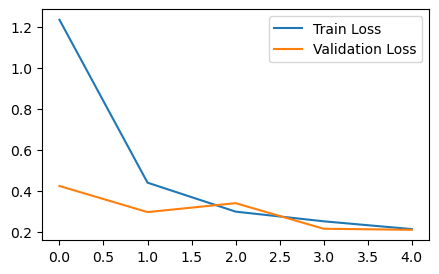

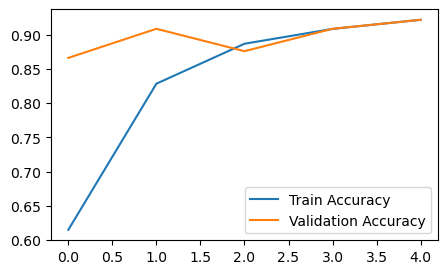

In [40]:
# plot the loss value
plt.figure(figsize=(5,3))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.figure(figsize=(5,3))
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.show()

In [31]:
model.save("model.h5")

In [32]:
mod = tf.keras.models.load_model('model.h5')

1/1 [==============================] - 0s 22ms/step
The Prediction For This Image = 0
The Actual Prediction For This Image = 0


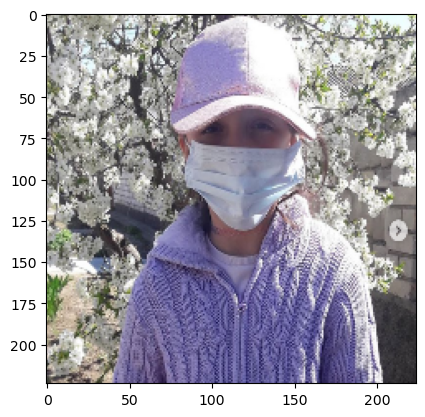

In [36]:
# 1 : Non Mask, 0 : Mask
idx = np.random.randint(0,x_test.shape[0])
pic = x_test[idx]
Ipic = np.expand_dims(pic,axis=0)
IFpic = mod.predict(Ipic)
predictions = np.argmax(IFpic)
print("The Prediction For This Image =",predictions)
print("The Actual Prediction For This Image =",labelEnc_test[idx])
fig,ax = plt.subplots()
ax.imshow(pic)
plt.imshow(pic)

In [12]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 58.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.2/286.2 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 7.8 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4711 sha256=7074ad17f66655ab8e0ae305597024cc3321e3f20dcef60a46104d819dce3325
  Stored in directory: /root/.cache/pip/wheels/c0/96/80/1aeaaf27265398a7393b296714b84e51a7d00101f8a665a25a
Successfully built ffmpy


In [17]:
# def predict_input_image(img):
#     image = img.reshape(-1,224,224,3)
#     prediction = mod.predict(image)[0]
#     predictions = np.argmax(prediction)
#     return 'Non Mask' if predictions == 1 else 'Mask' 

In [37]:
labels = np.unique(y_train)
labels

array(['Mask', 'Non Mask'], dtype='<U8')

In [38]:
def predict_input_image(img):
    image = img.reshape(-1,224,224,3)
    prediction = mod.predict(image)[0]
    confidences = {labels[i]: float(prediction[i]) for i in range(2)}
    return confidences

In [39]:
import gradio as gr
image = gr.inputs.Image(shape=(224,224))
label = gr.outputs.Label(num_top_classes=2)
gr.Interface(fn=predict_input_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

/opt/conda/lib/python3.7/site-packages/gradio/inputs.py:258: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/opt/conda/lib/python3.7/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/opt/conda/lib/python3.7/site-packages/gradio/outputs.py:198: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/opt/conda/lib/python3.7/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

Kaggle notebooks require sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://6ad6bca6bf6028b348.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


1/1 [==============================] - 0s 21ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://6ad6bca6bf6028b348.gradio.live
